# PROYECTO METODOS DE CLASIFICACION 


Este conjunto de datos contiene información sobre impagos, factores demográficos, datos crediticios, historial de pagos y extractos de facturas de clientes de tarjetas de crédito en Taiwán desde abril de 2005 hasta septiembre de 2005.



Hay 25 variables:

- ID: ID de cada cliente
- LIMIT_BAL: Importe del crédito concedido en dólares taiwaneses (incluye crédito individual y familiar/suplementario).
- SEX: Sexo (1=masculino, 2=femenino)
- EDUCATION: (1=grado, 2=universidad, 3=bachillerato, 4=otros, 5=desconocido, 6=desconocido)
- MARRIAGE: Estado civil (1=casado, 2=soltero, 3=otros)
- AGE: Edad en años
- PAY_0: Estado de reembolso en septiembre de 2005 (-1=ha pagado debidamente, 1=retraso en el pago durante un mes, 2=retraso en el pago durante dos meses, ... 8=retraso en el pago de ocho meses, 9=retraso en el pago de nueve meses y más)
- PAY_2: Situación de reembolso en agosto de 2005 (escala idéntica a la anterior)
- PAY_3: situación de reembolso en julio de 2005 (escala idéntica a la anterior)
- PAGO_4: Situación del reembolso en junio de 2005 (escala idéntica a la anterior)
- PAY_5: Situación del reembolso en mayo de 2005 (escala idéntica a la anterior)
- PAY_6: Estado del reembolso en abril de 2005 (escala idéntica a la anterior)
- BILL_AMT1: Importe de la factura en septiembre de 2005 (dólares NT)
- BILL_AMT2: Importe de la factura en agosto de 2005 (dólares NT)
- BILL_AMT3: Importe del extracto de cuenta de julio de 2005 (dólares NT)
- BILL_AMT4: Importe del extracto de cuenta de junio de 2005 (dólares NT)
- BILL_AMT5: Importe de la factura de mayo de 2005 (dólares NT)
- BILL_AMT6: Importe del extracto de cuenta de abril de 2005 (dólares NT)
- PAGO_AMT1: Importe del pago anterior en septiembre de 2005 (dólares NT)
- PAY_AMT2: Importe del pago anterior en agosto de 2005 (dólares NT)
- PAY_AMT3: Importe del pago anterior en julio de 2005 (dólares NT)
- PAY_AMT4: Importe del pago anterior en junio de 2005 (dólares NT)
- PAY_AMT5: Importe del pago anterior en mayo de 2005 (dólares NT)
- PAY_AMT6: Importe del pago anterior en abril de 2005 (en dólares taiwaneses)
default.payment.next.month: Pago por defecto (1=sí, 0=no)

Para este proyecto vamos a realizar un EDA sobre el conjunto de datos, una vez realizado vamos a entrenar y evaluar diferentes modelos de clasificacion para identificar que modelo es el mas eficiente a la hora de predecir que cliente cumplira con sus pagos y que cliente no lo hara.

Cualquier publicación basada en este conjunto de datos debe mencionar lo siguiente:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

El conjunto de datos original puede consultarse en el repositorio de aprendizaje automático de la UCI.

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
# Cargamos el conjunto de datos
df_creditcard = pd.read_csv('UCI_Credit_Card.csv')

# EDA

In [3]:
# Visualizamos el conjunto de datos
df_creditcard

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
# Visualizamos un resumen de las variables
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Visualizamos un resumen estadistico de las variables
df_creditcard.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# Comprobamos que no existan valores faltantes
df_creditcard.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <A

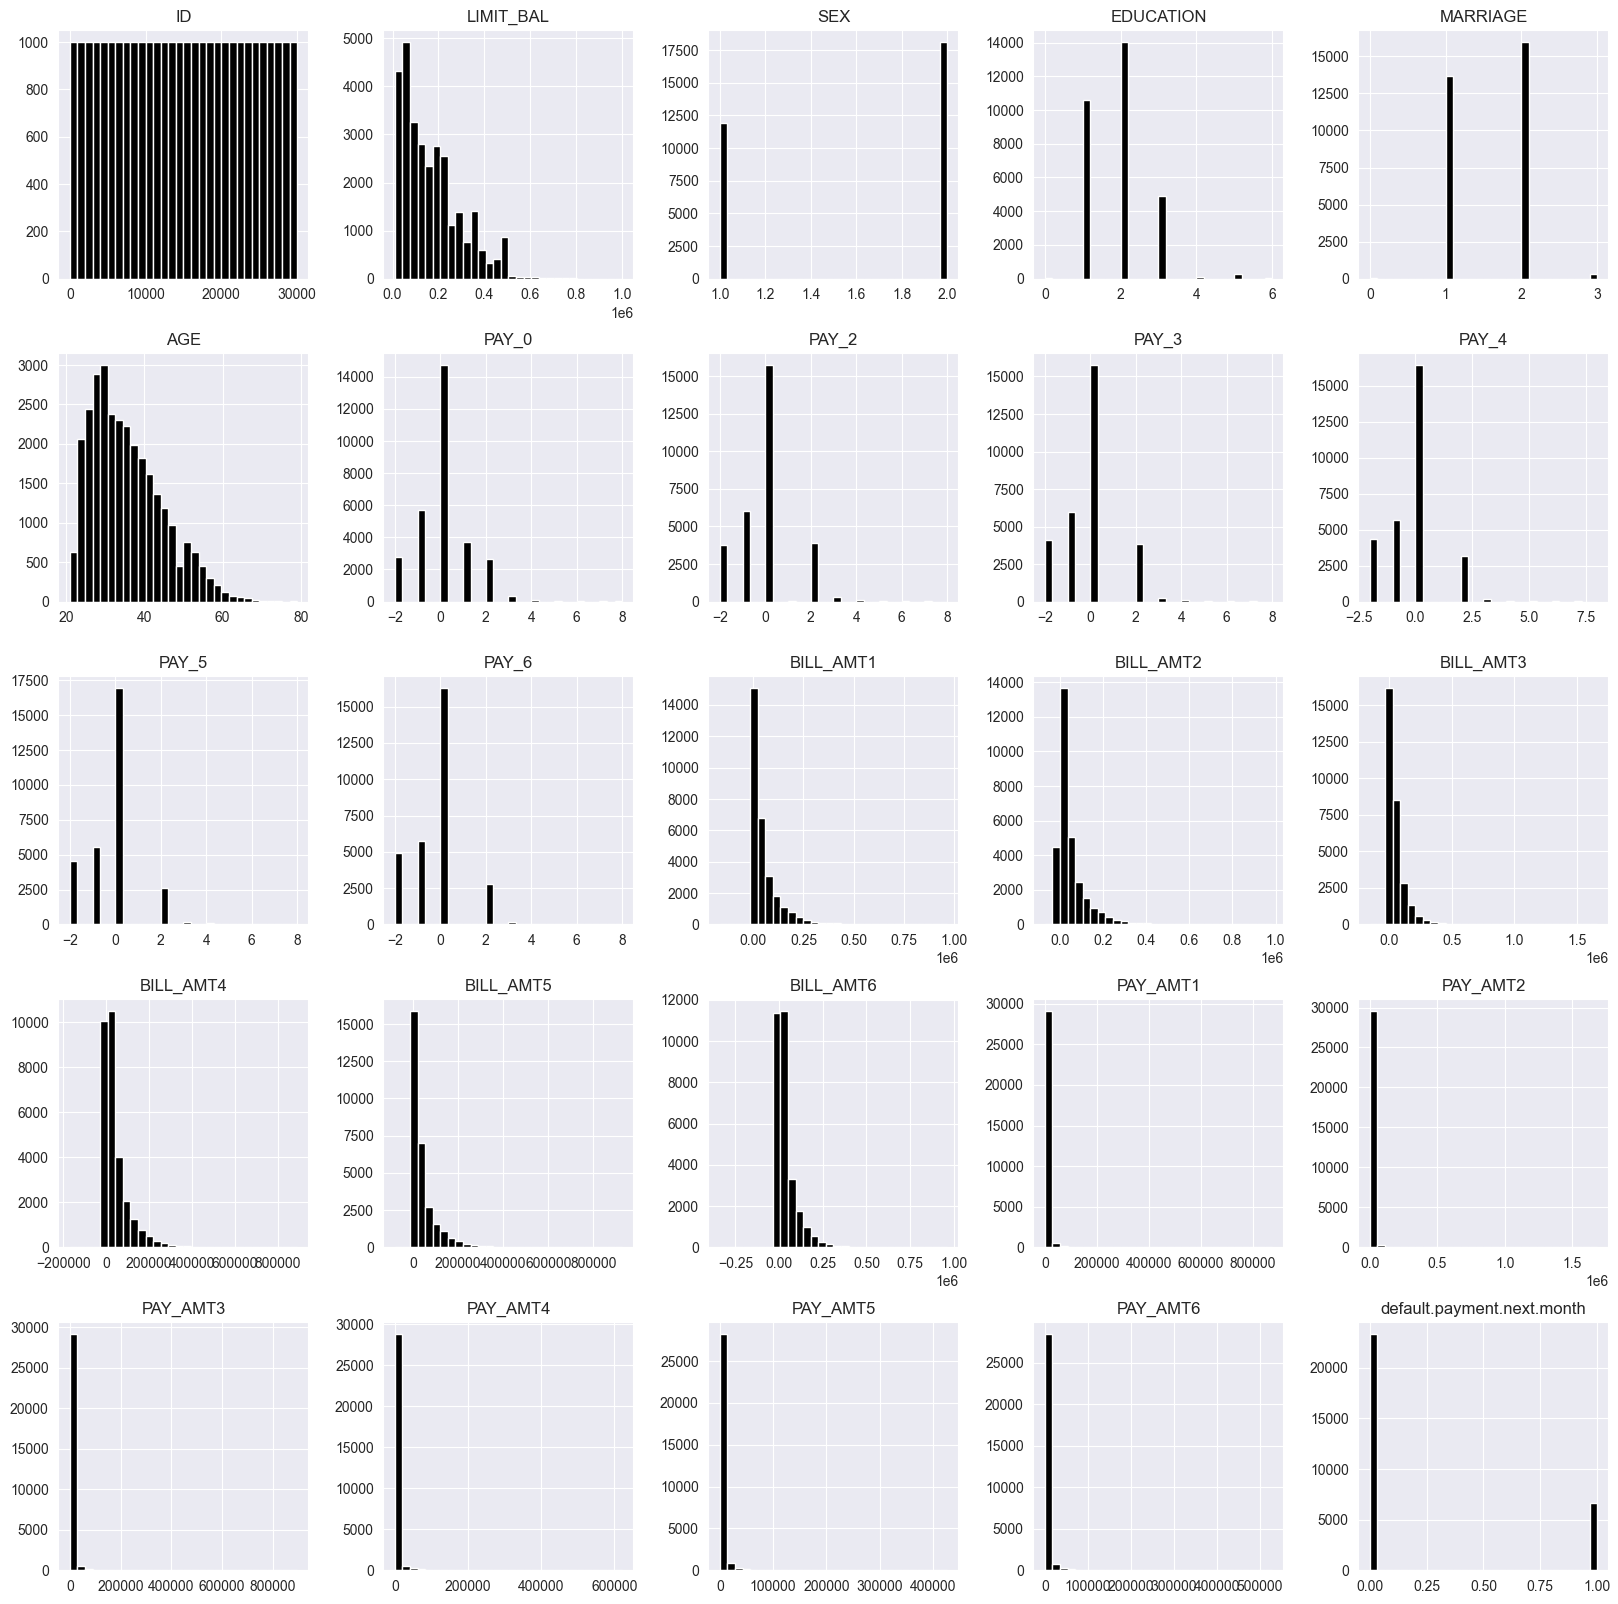

In [7]:
# Visualizamos la distribucion de las variables
df_creditcard.hist(bins = 30, figsize = (20,20), color = 'black')

In [8]:
# Eliminamos las variables que no aportan informacion
df_creditcard.drop(['ID'], axis = 1, inplace = True)

In [9]:
# Comprobamos el dataframe
df_creditcard

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [10]:
# Vemos cuantos clientes pagan y cuantos no su tarjeta de credito
cc_not_paid = df_creditcard[df_creditcard['default.payment.next.month'] == 1]
cc_paid = df_creditcard[df_creditcard['default.payment.next.month'] == 0]

In [11]:
# Exploramos los datos de los clientes que pagan su tarjeta de credito
cc_paid.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


In [12]:
# Exploramos los datos de los clientes que no pagan su tarjeta de credito
cc_not_paid.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [13]:
# Describimos los hallazgos

print("Total clientes: ", len(df_creditcard))
print("Clientes que pagan: ", len(cc_paid))
print("Porcentaje de clientes que pagan: ", (1 - (len(cc_not_paid)/len(df_creditcard))) * 100, "%")
print("Clientes que no pagan: ", len(cc_not_paid))
print("Porcentaje de clientes que no pagan: ", (len(cc_not_paid)/len(df_creditcard)) * 100, "%")

Total clientes:  30000
Clientes que pagan:  23364
Porcentaje de clientes que pagan:  77.88 %
Clientes que no pagan:  6636
Porcentaje de clientes que no pagan:  22.12 %


<Axes: >

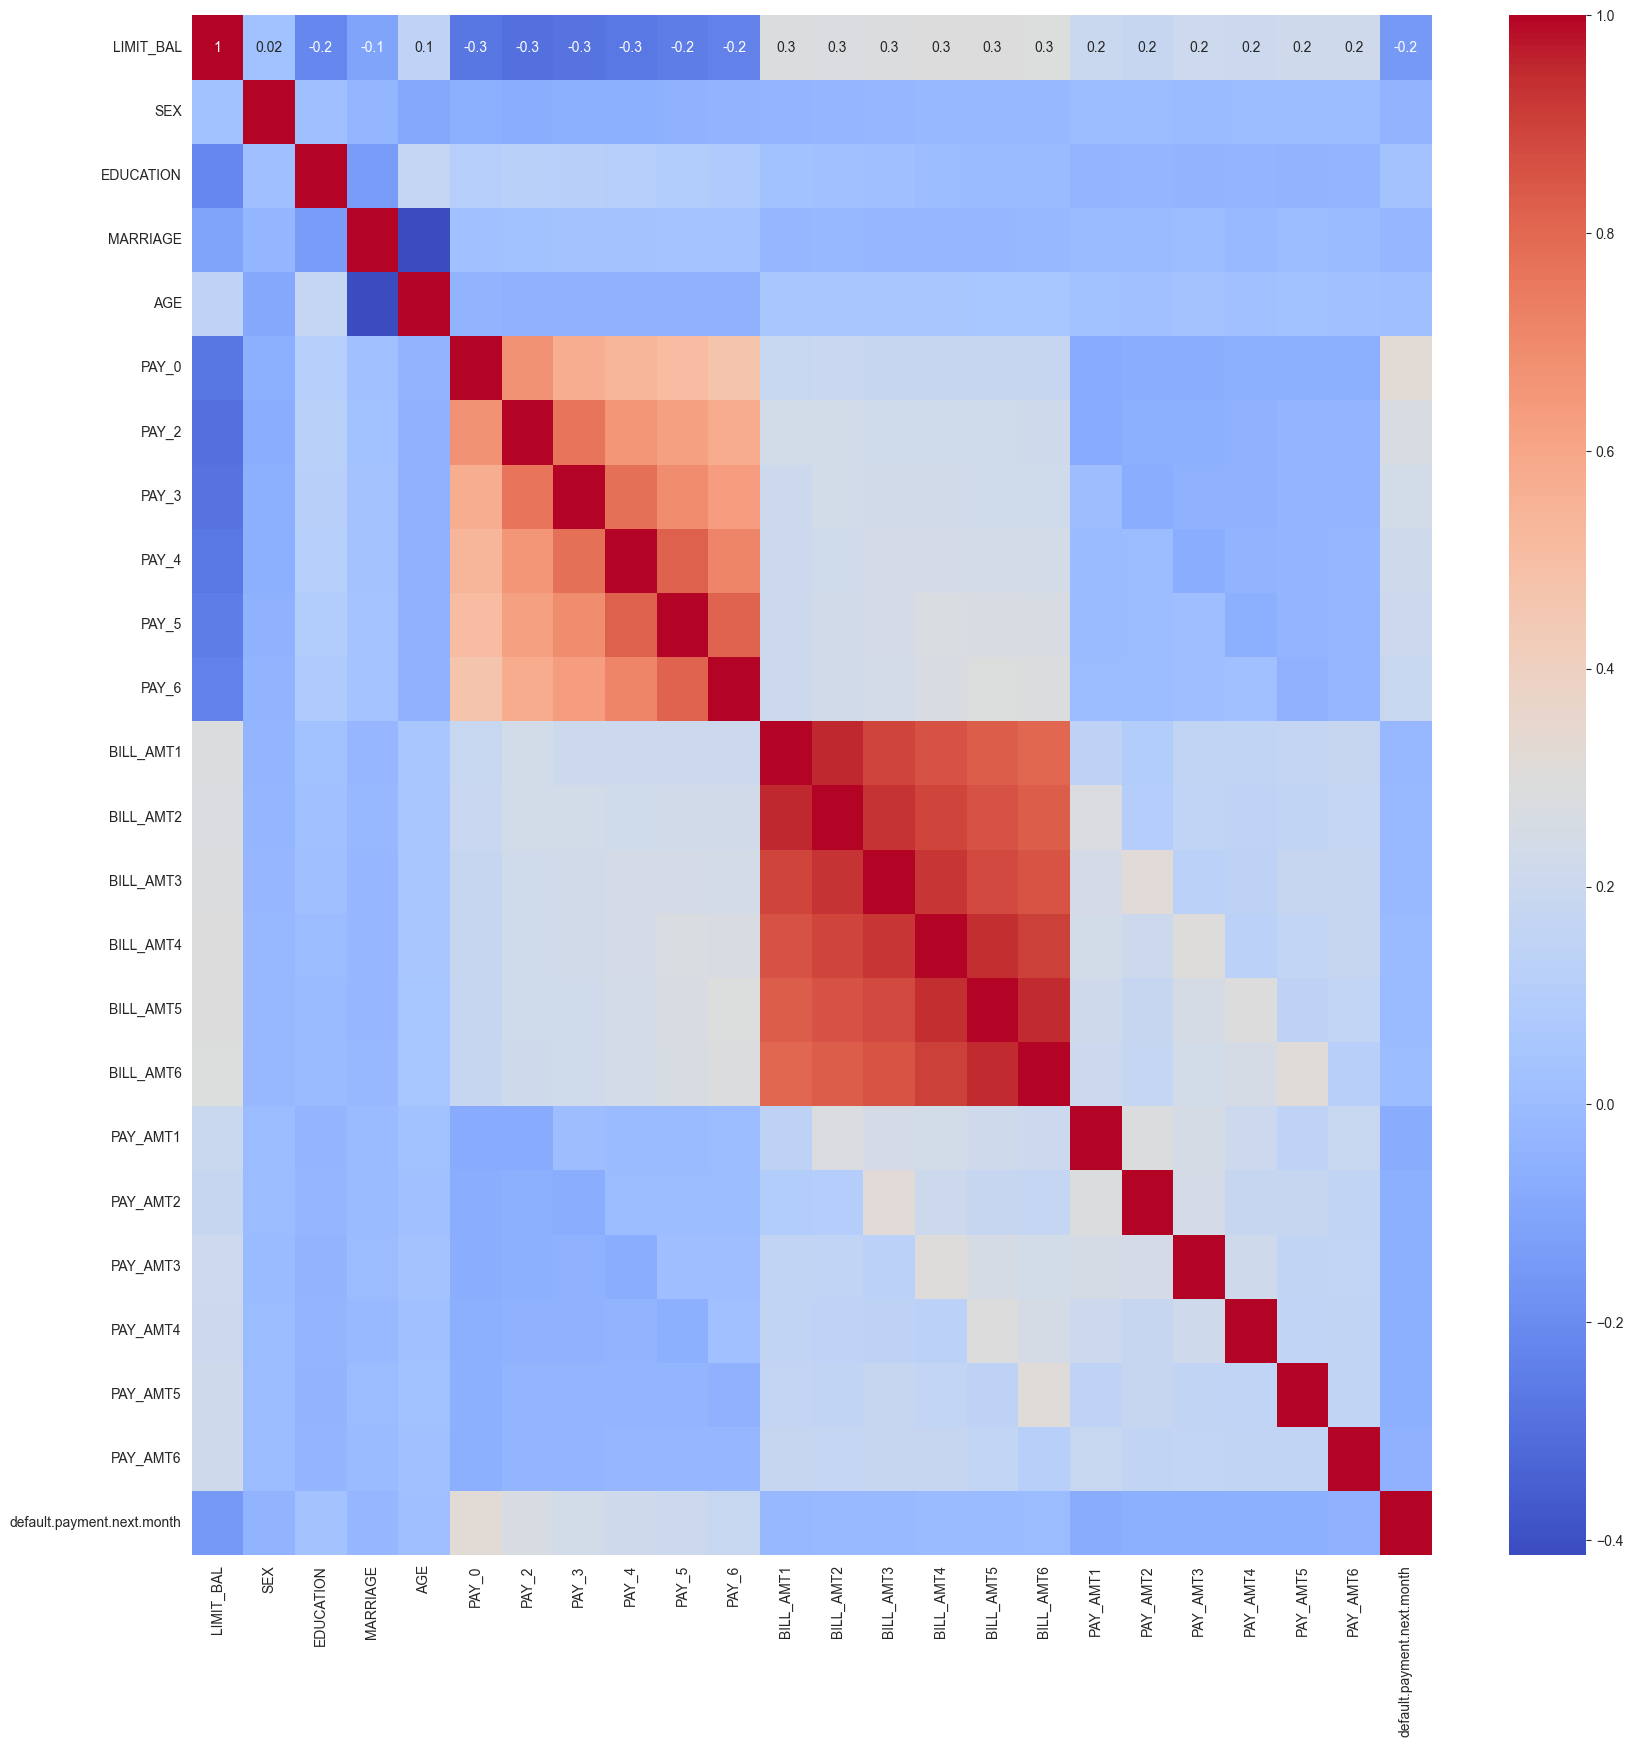

In [14]:
# Vemos la correlacion entre las variables con un mapa de calor
plt.figure(figsize = (20,20))
sns.heatmap(df_creditcard.corr(), annot = True, fmt = '.1g', cmap= 'coolwarm')

C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


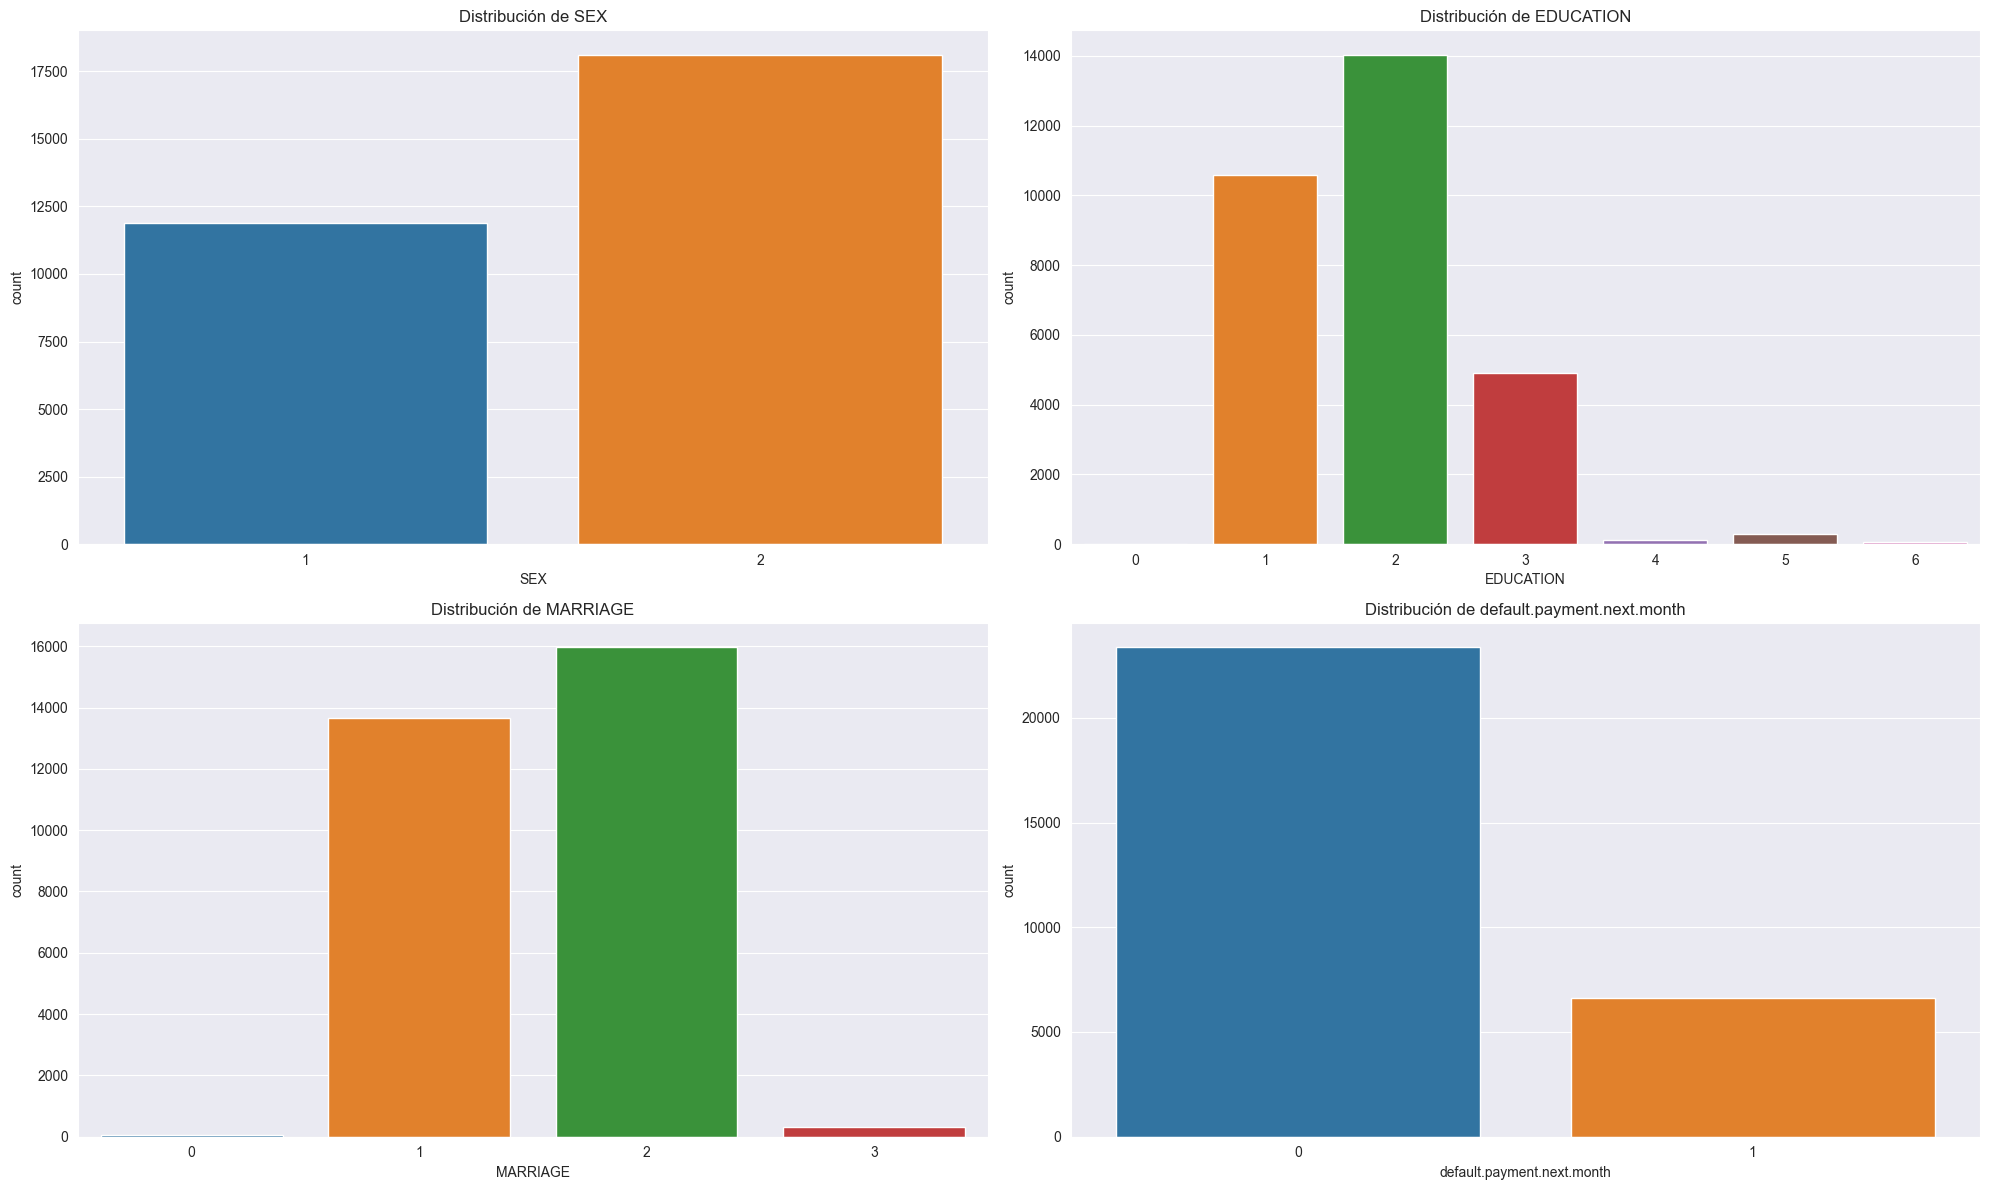

In [18]:
# Visualizamos las variables categoricas
plt.figure(figsize=(20, 12))
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data = df_creditcard, x=feature)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()

# PREPARACION DE LOS DATOS PARA EL MODELO

In [19]:
# Separamos las variables categoricas
X_cat = df_creditcard[['SEX', 'EDUCATION', 'MARRIAGE']]
X_cat

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [20]:
# Convertimos las variables categoricas en variables dummy
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [21]:
# Vemos la forma de las variables categoricas
X_cat.shape

(30000, 13)

In [22]:
# Convertimos las variables categoricas en un dataframe
X_cat = pd.DataFrame(X_cat)

In [23]:
# Verificamos el dataframe
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Separamos las variables numericas
X_numerical = df_creditcard[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6']]

In [25]:
# Verificamos el dataframe
X_numerical

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [26]:
# Concatenamos las variables categoricas y numericas
X = pd.concat([X_cat, X_numerical], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


# PREPROCESADO DE LOS DATOS

In [37]:
# Escalamos los datos
X.columns = X.columns.astype(str)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [38]:
# Obtenemos la variable a predecir
y = df_creditcard['default.payment.next.month']

In [39]:
# Visualizamos informacion del dataframe
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [40]:
# Separamos los datos en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
# Visualizamos la forma de los datos de entrenamiento
X_train.shape

(24000, 33)

In [42]:
# Visualizamos la forma de los datos de test
X_test.shape

(6000, 33)

# ENTRENAMIENTO DEL MODELO CON XGBOOST

In [43]:
# Entrenamos el modelo
import xgboost as xgb
model_xgb = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 20, use_label_encoder = False)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
# Realizamos las predicciones
y_pred = model_xgb.predict(X_test)

In [48]:
# Evaluamos el modelo 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 81.56666666666666 %


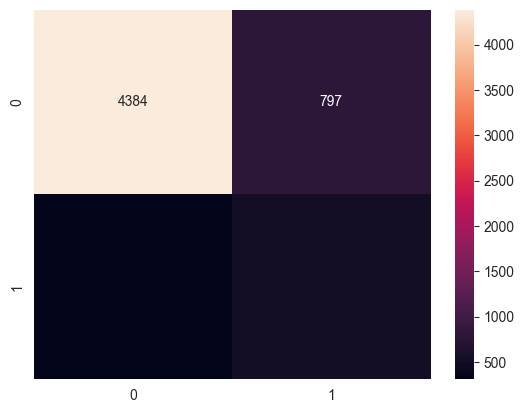

In [50]:
# Visualizamos la matriz de confusion
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

In [52]:
# Visualizamos el reporte de clasificacion
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4693
           1       0.62      0.39      0.48      1307

    accuracy                           0.82      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000


# ENTRENAMIENTO DEL MODELO CON REGRESION LOGISTICA

In [53]:
X_train

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.83091787e-03, 1.64115453e-02, 1.13493207e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.83252818e-02, 0.00000000e+00, 2.30107478e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.77133655e-03, 2.66570386e-03, 2.45901949e-03],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.19162641e-03, 2.57895712e-03, 7.18790314e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.11226435e-03, 3.57881914e-03]])

In [54]:
# Entrenamos el modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression(max_iter = 10000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [55]:
# Realizamos las predicciones
y_pred = model_LR.predict(X_test)

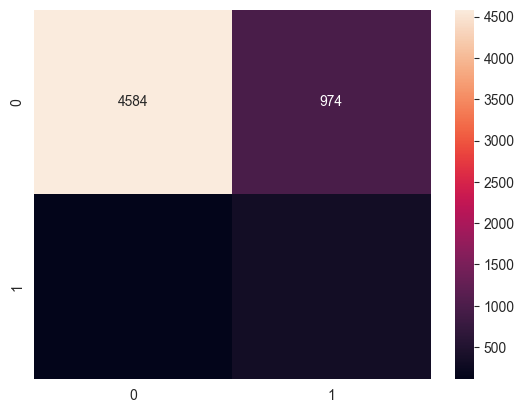

In [56]:
# Visualizamos la matriz de confusion
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

In [57]:
# Visualizamos el reporte de clasificacion
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4693
           1       0.75      0.25      0.38      1307

    accuracy                           0.82      6000
   macro avg       0.79      0.62      0.64      6000
weighted avg       0.81      0.82      0.78      6000


# ENTRENAMIENTO DEL MODELO CON SVM

In [58]:
# Entrenamos el modelo
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=1000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [59]:
# Realizamos las predicciones
y_pred = model_svm.predict(X_test)

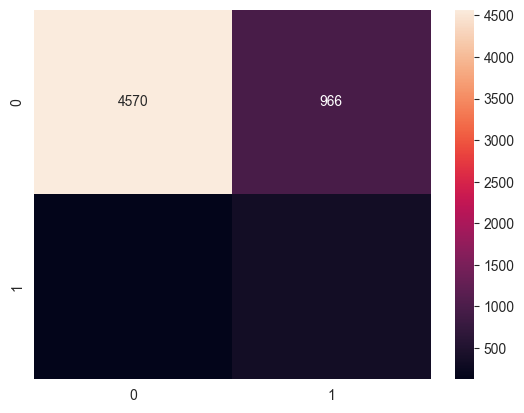

In [60]:
# Visualizamos la matriz de confusion
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

In [61]:
# Visualizamos el reporte de clasificacion
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4693
           1       0.73      0.26      0.39      1307

    accuracy                           0.82      6000
   macro avg       0.78      0.62      0.64      6000
weighted avg       0.81      0.82      0.78      6000


# ENTRENAMIENTO DEL MODELO CON RANDOM FOREST

In [62]:
# Entrenamos el modelo
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
# Realizamos las predicciones
y_predict = model_rf.predict(X_test)

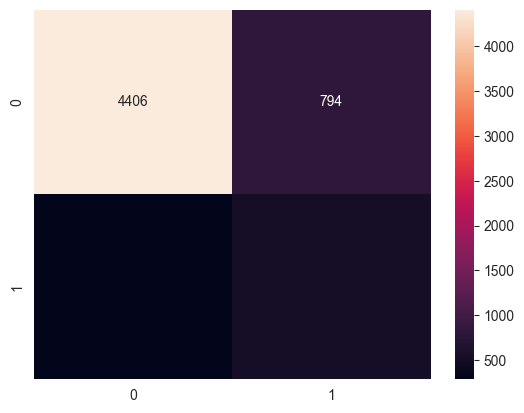

In [64]:
# Visualizamos la matriz de confusion
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

In [65]:
# Visualizamos el reporte de clasificacion
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4693
           1       0.64      0.39      0.49      1307

    accuracy                           0.82      6000
   macro avg       0.74      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000


# ENTRENAMIENTO DEL MODELO CON KNN

In [66]:
# Entrenamos el modelo
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
# Realizamos las predicciones
y_predict = model_knn.predict(X_test)

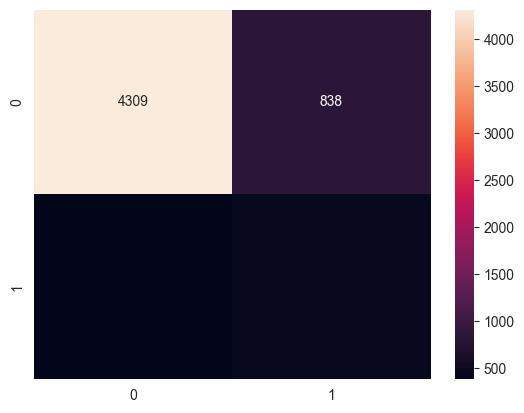

In [68]:
# Visualizamos la matriz de confusion
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

In [69]:
# Visualizamos el reporte de clasificacion
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4693
           1       0.55      0.36      0.43      1307

    accuracy                           0.80      6000
   macro avg       0.69      0.64      0.66      6000
weighted avg       0.77      0.80      0.78      6000


# ENTRENAMIENTO DEL MODELO CON NAIVE BAYES

In [70]:
# Entrenamos el modelo
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [71]:
# Realizamos las predicciones
y_predict = model_gnb.predict(X_test)

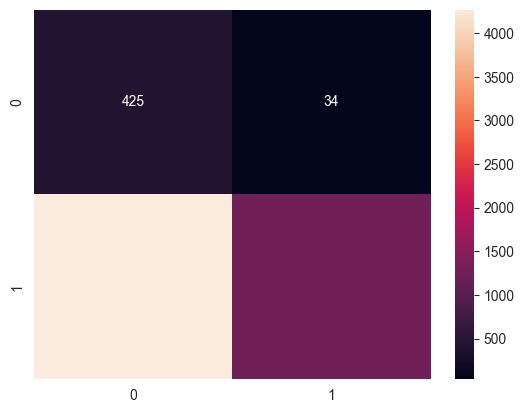

In [72]:
# Visualizamos la matriz de confusion
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

In [73]:
# Visualizamos el reporte de clasificacion
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.09      0.16      4693
           1       0.23      0.97      0.37      1307

    accuracy                           0.28      6000
   macro avg       0.58      0.53      0.27      6000
weighted avg       0.77      0.28      0.21      6000


# GRAFICAMOS LA CURVA ROC DE LOS MODELOS ENTRENADOS PARA COMPARAR SU DESEMPEÑO Y OBTENEMOS LAS PUNTACIONES AUC

In [74]:
# ROC curve
from sklearn.metrics import roc_curve

fpr0, tpr0, thresh0 = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1], pos_label=1)
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label=1)

# AUC score

from sklearn.metrics import roc_auc_score

auc_score0 = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("XG-Boost Classifier: ", auc_score0)  # XG-Boost
print("Logistic Regression: ", auc_score1)  # Logistic Regression
print("Support Vector Machine: ", auc_score2)  # Support Vector Machine
print("Random Forest: ", auc_score3)  # Random Forest
print("K-Nearest Neighbors: ", auc_score4)  # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5)  # Naive Bayes

XG-Boost Classifier:  0.7706776815687497
Logistic Regression:  0.7306652976294603
Support Vector Machine:  0.7298036715217165
Random Forest:  0.7746144243546895
K-Nearest Neighbors:  0.7065740849278035
Naive Bayes:  0.7440015090276733


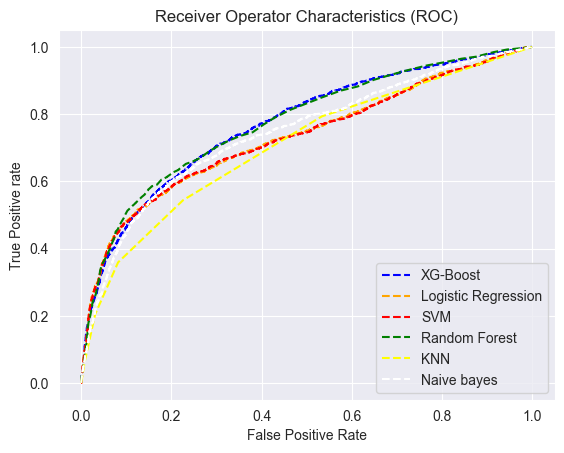

In [75]:
# Graficamos la curva ROC
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "XG-Boost")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()